In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("Software Vacancy.xlsx")
df.head()

,Unnamed: 0,Name,Url to Vacancy,Company,Location,Type of Employment,Age category,Education degree,Salary,Posting Date,Deadline Date,Skills
0,0,Mobil tətbiq üzrə məhsul mütəxəssisi,https://busy.az/vacancy/132205/mobil-tetbiq-uz...,189 Taxi,Bakı,Tam ştat (full time),NaN,Ali,Razılaşma yolu ilə,04.07.2024,18.07.2024,"['software development', 'programming', 'mobil..."
1,1,Senior Backend Developer,https://busy.az/vacancy/132086/senior-backend-...,Ferrum Capital,Bakı,Tam ştat (full time),NaN,NaN,Razılaşma yolu ilə,03.07.2024,17.07.2024,"['Oracle', 'T-SQL', 'OOP', 'back-end developme..."
2,2,Proqramlaşdırma İdarəsinin Tətbiqi proqramlaşd...,https://busy.az/vacancy/132034/proqramlasdirma...,Xalq Bank,Bakı,Tam ştat (full time),NaN,NaN,Razılaşma yolu ilə,03.07.2024,17.07.2024,"['SQL', 'back-end development', 'programming',..."
3,3,Mid IOS Developer,https://busy.az/vacancy/132014/mid-ios-developer,Golden Pay,Bakı,Tam ştat (full time),NaN,NaN,Razılaşma yolu ilə,03.07.2024,17.07.2024,"['proqramlaşdırma', 'iOS development', 'progra..."
4,4,IOS Developer (middle),https://busy.az/vacancy/131978/ios-developer-m...,Express Bank,Bakı,Tam ştat (full time),NaN,NaN,Razılaşma yolu ilə,03.07.2024,17.07.2024,"['OOP', 'proqramlaşdırma', 'iOS development', ..."


In [3]:
df.drop("Unnamed: 0",axis=1,inplace=True)
df.head()

,Name,Url to Vacancy,Company,Location,Type of Employment,Age category,Education degree,Salary,Posting Date,Deadline Date,Skills
0,Mobil tətbiq üzrə məhsul mütəxəssisi,https://busy.az/vacancy/132205/mobil-tetbiq-uz...,189 Taxi,Bakı,Tam ştat (full time),NaN,Ali,Razılaşma yolu ilə,04.07.2024,18.07.2024,"['software development', 'programming', 'mobil..."
1,Senior Backend Developer,https://busy.az/vacancy/132086/senior-backend-...,Ferrum Capital,Bakı,Tam ştat (full time),NaN,NaN,Razılaşma yolu ilə,03.07.2024,17.07.2024,"['Oracle', 'T-SQL', 'OOP', 'back-end developme..."
2,Proqramlaşdırma İdarəsinin Tətbiqi proqramlaşd...,https://busy.az/vacancy/132034/proqramlasdirma...,Xalq Bank,Bakı,Tam ştat (full time),NaN,NaN,Razılaşma yolu ilə,03.07.2024,17.07.2024,"['SQL', 'back-end development', 'programming',..."
3,Mid IOS Developer,https://busy.az/vacancy/132014/mid-ios-developer,Golden Pay,Bakı,Tam ştat (full time),NaN,NaN,Razılaşma yolu ilə,03.07.2024,17.07.2024,"['proqramlaşdırma', 'iOS development', 'progra..."
4,IOS Developer (middle),https://busy.az/vacancy/131978/ios-developer-m...,Express Bank,Bakı,Tam ştat (full time),NaN,NaN,Razılaşma yolu ilə,03.07.2024,17.07.2024,"['OOP', 'proqramlaşdırma', 'iOS development', ..."


In [4]:
df.shape

(1796, 11)

In [5]:
df.isna().sum()

Name                     0
Url to Vacancy           0
Company                  0
Location               623
Type of Employment       0
Age category          1717
Education degree      1058
Salary                   0
Posting Date             8
Deadline Date            8
Skills                   0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1796 entries, 0 to 1795
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Name                1796 non-null   object
 1   Url to Vacancy      1796 non-null   object
 2   Company             1796 non-null   object
 3   Location            1173 non-null   object
 4   Type of Employment  1796 non-null   object
 5   Age category        79 non-null     object
 6   Education degree    738 non-null    object
 7   Salary              1796 non-null   object
 8   Posting Date        1788 non-null   object
 9   Deadline Date       1788 non-null   object
 10  Skills              1796 non-null   object
dtypes: object(11)
memory usage: 154.5+ KB


In [7]:
df.duplicated().sum()

13

In [8]:
df[df.duplicated(keep=False)][:2]

,Name,Url to Vacancy,Company,Location,Type of Employment,Age category,Education degree,Salary,Posting Date,Deadline Date,Skills
442,PHP Developer,https://busy.az/vacancy/98258/php-developer,Push30,Bakı,Tam ştat (full time),NaN,Ali (bakalavr),Razılaşma yolu ilə,25.04.2023,25.05.2023,"['HTML', 'CSS', 'JavaScript', 'programming', '..."
443,PHP Developer,https://busy.az/vacancy/98258/php-developer,Push30,Bakı,Tam ştat (full time),NaN,Ali (bakalavr),Razılaşma yolu ilə,25.04.2023,25.05.2023,"['HTML', 'CSS', 'JavaScript', 'programming', '..."


# Cleaning

In [9]:
df_clean = df.copy()
df_clean.columns = df_clean.columns.str.replace(" ","_")
df_clean.columns

Index(['Name', 'Url_to_Vacancy', 'Company', 'Location', 'Type_of_Employment',
       'Age_category', 'Education_degree', 'Salary', 'Posting_Date',
       'Deadline_Date', 'Skills'],
      dtype='object')

In [29]:
df_clean.head()

,Name,Url_to_Vacancy,Company,Location,Type_of_Employment,Age_category,Education_degree,Salary,Posting_Date,Deadline_Date,Skills
0,Mobil tətbiq üzrə məhsul mütəxəssisi,https://busy.az/vacancy/132205/mobil-tetbiq-uz...,189 Taxi,Bakı,Tam ştat (full time),NaN,Ali,Razılaşma yolu ilə,04.07.2024,18.07.2024,"['software development', 'programming', 'mobil..."
1,Senior Backend Developer,https://busy.az/vacancy/132086/senior-backend-...,Ferrum Capital,Bakı,Tam ştat (full time),NaN,NaN,Razılaşma yolu ilə,03.07.2024,17.07.2024,"['Oracle', 'T-SQL', 'OOP', 'back-end developme..."
2,Proqramlaşdırma İdarəsinin Tətbiqi proqramlaşd...,https://busy.az/vacancy/132034/proqramlasdirma...,Xalq Bank,Bakı,Tam ştat (full time),NaN,NaN,Razılaşma yolu ilə,03.07.2024,17.07.2024,"['SQL', 'back-end development', 'programming',..."
3,Mid IOS Developer,https://busy.az/vacancy/132014/mid-ios-developer,Golden Pay,Bakı,Tam ştat (full time),NaN,NaN,Razılaşma yolu ilə,03.07.2024,17.07.2024,"['proqramlaşdırma', 'iOS development', 'progra..."
4,IOS Developer (middle),https://busy.az/vacancy/131978/ios-developer-m...,Express Bank,Bakı,Tam ştat (full time),NaN,NaN,Razılaşma yolu ilə,03.07.2024,17.07.2024,"['OOP', 'proqramlaşdırma', 'iOS development', ..."


In [11]:
df_clean['Location'].value_counts()

Location
Bakı                                                                                                                                                                                                                                                             1158
Abşeron rayonu/Xırdalan                                                                                                                                                                                                                                             5
Sumqayıt                                                                                                                                                                                                                                                            4
Göygöl                                                                                                                                                                                                       

In [12]:
df_clean['Education_degree'].value_counts()

Education_degree
Ali               524
Ali (bakalavr)    211
Ali (Magistr)       2
Elmlər doktoru      1
Name: count, dtype: int64

In [13]:
print("Totalunique company count", df_clean['Company'].nunique())
df_clean['Company'].value_counts()

Totalunique company count 379


Company
Kapital Bank           57
eManat                 43
Bank Respublika ASC    41
Ateshgah Sigorta       39
PASHA Bank             36
                       ..
Fizza Pay               1
POS.az                  1
Capital XR              1
Engineering company     1
Oilfield Company        1
Name: count, Length: 379, dtype: int64

In [14]:
df_clean['Type_of_Employment'].value_counts()

Type_of_Employment
Tam ştat (full time)          1783
Təcrübəçi (stajor, intern)      11
Layihə/Müvəqqəti                 2
Name: count, dtype: int64

In [89]:
df_clean['Salary'].value_counts().head(20)

Salary
Razılaşma yolu ilə    1520
1200 - 1500             45
1500 - 2500             42
2000 - 3000             29
2500 - 3500             16
300-800                 14
700 - 1100              12
600 - 1000               5
1500 - 3000              5
2500 - 3000              5
1000 - 1200              4
2000 - 3500              4
800 - 1200               4
1200 - 1800              3
600 - 700                3
700 - 2500               3
800 - 1300               3
1500 - 1800              3
1000 - 3000              3
2000 - 4000              3
Name: count, dtype: int64

In [91]:
replacement_dict = {
    "2000 - 2500":"2000 - 3000",
    "1000 - 1400":"1200 - 1500",
    "1000 - 1500":"1200 - 1500",
    "1500 - 2000":"1500 - 2500",
    "3000 - 3500":"2500 - 3500",
    "1300 - 1500":"1200 - 1500",
    "1500 - 3000":"2000 - 3000",
    "3500 - 4500":"2500 - 5000",
    "800 - 1800":"1500 - 2000",

    "2250":"2000 - 3000",
    "1300":"1200 - 1500",
    "1200":"1200 - 1500",
    "2000":"1500 - 2000",
    "1500":"1200 - 1500",
    "3000":"2000 - 3000",
    "800":"1200 - 1500",
    "600 - 800":"300-800",                                
    "500 - 800":"300-800",
    "500":"500 - 1200",

    "1000":"700 - 1100",
    "400":"300-800",
}
df_clean['Salary'].replace(replacement_dict,inplace=True)

In [92]:
df_clean['Salary'].value_counts().head(20)

Salary
Razılaşma yolu ilə    1520
1200 - 1500             45
1500 - 2500             42
2000 - 3000             34
2500 - 3500             16
300-800                 14
700 - 1100              12
600 - 1000               5
2500 - 3000              5
1000 - 1200              4
800 - 1200               4
2000 - 3500              4
1000 - 2000              3
600 - 700                3
800 - 1000               3
2000 - 4000              3
1000 - 3000              3
1200 - 1800              3
800 - 1300               3
1500 - 1800              3
Name: count, dtype: int64

In [47]:
df_clean['Age_category'].value_counts()

Age_category
20  - 35    41
25  - 45    25
25  - 30    13
Name: count, dtype: int64

In [46]:
replacement_dict = {
    "20  - 30":"20  - 35",
    "20  - 28":"20  - 35",
    "21  - 30":"20  - 35",
    "22 - 35": "20  - 35",
    "22  - 28":"20  - 35",
    "22  - 30":"20  - 35",
    "22  - 35":"20  - 35",
    "22  - 26":"20  - 35",
    "23  - 30":"20  - 35",
    "23  - 28":"20  - 35",
    "23  - 35":"20  - 35",
    "24  - 35":"20  - 35",
    "25 - 30": "20  - 35",
    "25  - 35":"20  - 35",
    "24" : "20  - 35",

    "22  - 40":"25  - 45",
    "23  - 45":"25  - 45",
    "24  - 30":"25  - 30",
    "24  - 40":"25  - 45",
    "25  - 40":"25  - 45",
}

df_clean['Age_category'].replace(replacement_dict,inplace=True)

In [17]:
df_clean['Education_degree']  = df_clean['Education_degree'].replace("Ali (Magistr)","Ali")

In [18]:
df_clean['Location'] = df_clean['Location'].str.replace('\n', '', regex=False).replace('\t', '', regex=False).replace(r'\s+', '', regex=True)
df_clean['Location'].value_counts()

Location
Bakı                          1158
Abşeronrayonu/Xırdalan           5
Sumqayıt                         4
Göygöl                           1
QubaXaçmaz                       1
BakıAbşeronrayonu/Xırdalan       1
Gəncə                            1
Balakən                          1
HacıqabulŞirvan                  1
Name: count, dtype: int64

# Visualization

In [19]:
my_palatte = ["#FFA38F","#E9FF97","#FFD18E","#FF7EE2","#9CDBA6","#50B498","#468585","#5A639C","#E2BBE9"]

In [20]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

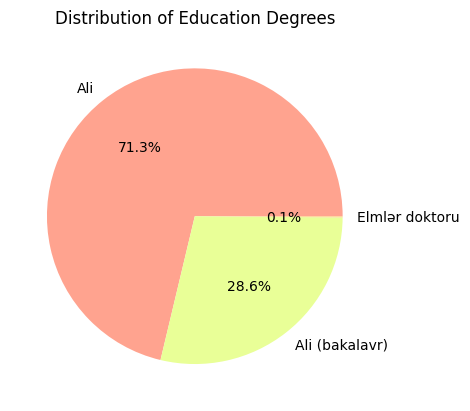

In [48]:
education = df_clean['Education_degree'].value_counts()

plt.pie(x=education.values, labels=education.index, autopct='%1.1f%%',colors=my_palatte)
plt.title('Distribution of Education Degrees')
plt.show()

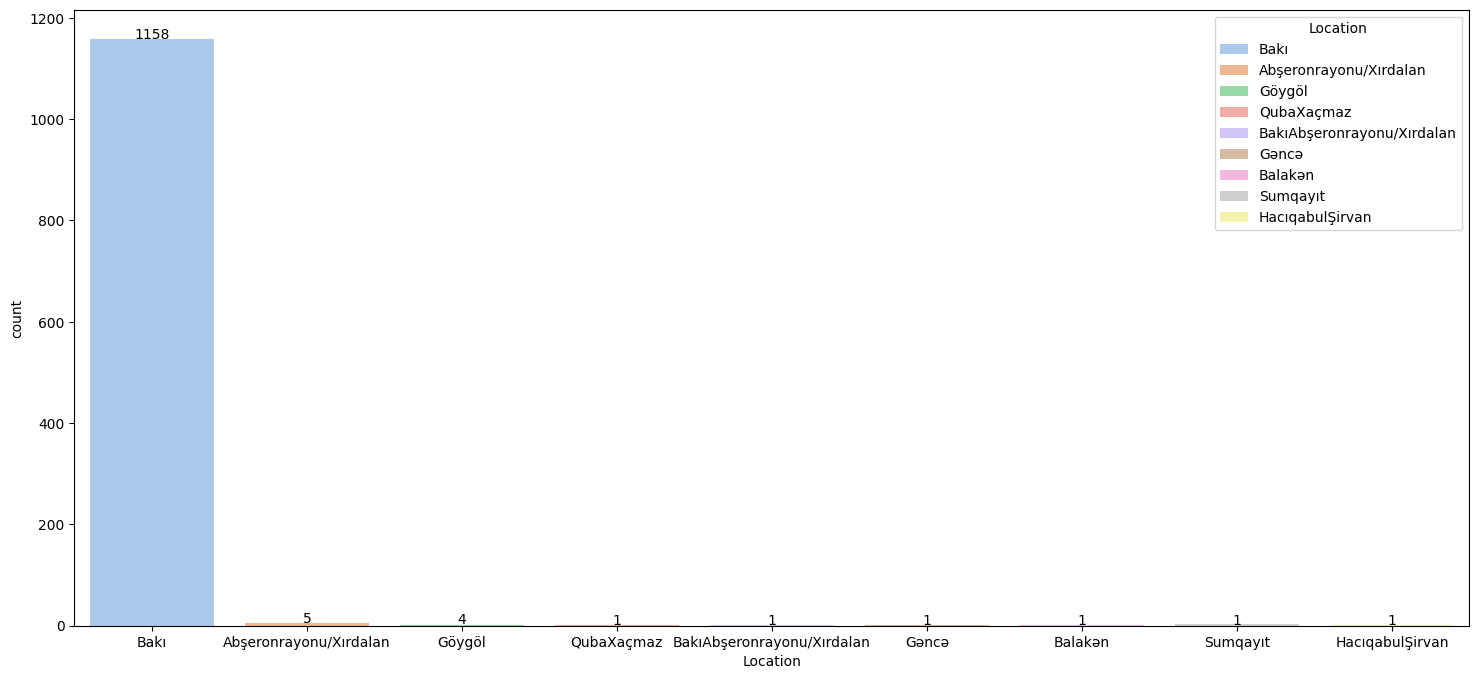

In [22]:
location = df_clean['Location']

plt.figure(figsize=(18,8))
addlabels(location.value_counts().index,location.value_counts().values)
sns.countplot(x=location, hue=location,palette="pastel")
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17104\3306706950.py:3: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  sns.countplot(x=type_emp, hue=type_emp,palette=my_palatte)


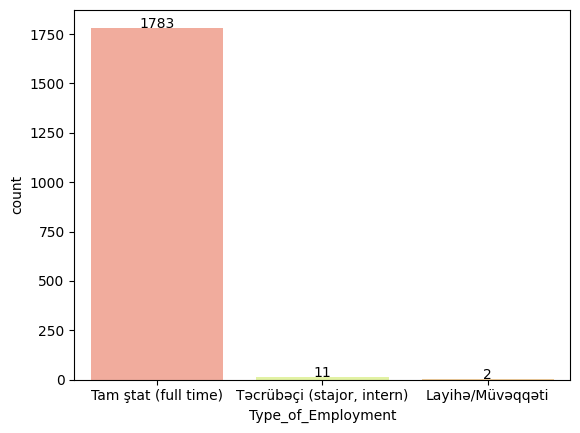

In [23]:
type_emp = df_clean['Type_of_Employment']
addlabels(type_emp.value_counts().index, type_emp.value_counts().values)
sns.countplot(x=type_emp, hue=type_emp,palette=my_palatte)
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17104\1382919106.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= df_clean['Salary'], order=top_10_salaries.index, palette=my_palatte)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17104\1382919106.py:4: UserWarning: 
The palette list has fewer values (9) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x= df_clean['Salary'], order=top_10_salaries.index, palette=my_palatte)


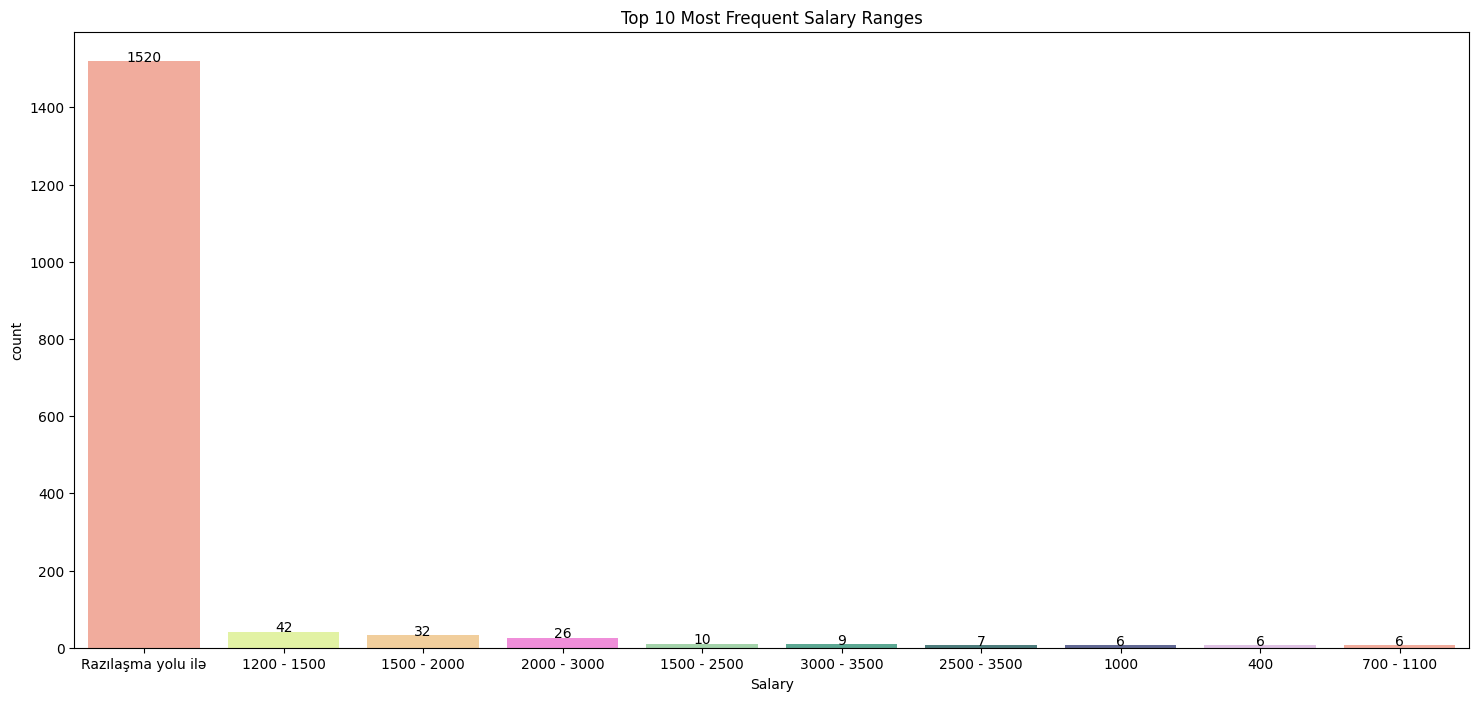

In [76]:
plt.figure(figsize=(18,8))

top_10_salaries =  df_clean['Salary'].value_counts().head(10)
sns.countplot(x= df_clean['Salary'], order=top_10_salaries.index, palette=my_palatte)
addlabels(top_10_salaries.index, top_10_salaries.values)

plt.title('Top 10 Most Frequent Salary Ranges')
plt.show()

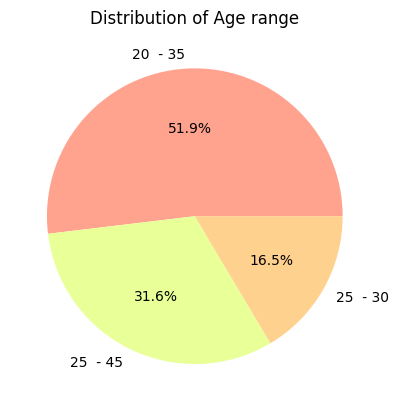

In [49]:
top_6_age_category = df_clean['Age_category'].value_counts().head(6)

plt.pie(x=top_6_age_category.values, labels=top_6_age_category.index, autopct='%1.1f%%',colors=my_palatte)
plt.title('Distribution of Age range')
plt.show()

In [26]:
df_clean2 = df_clean.copy()

In [27]:
def fill_na_with_mode(col_name):
    mode = df_clean[col_name].mode()[0]
    df_clean2[col_name].fillna(mode,inplace=True)

In [28]:
fill_na_with_mode("Location")
fill_na_with_mode("Education_degree")
fill_na_with_mode("Age_category")

df_clean2.isna().sum()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17104\470627057.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean2[col_name].fillna(mode,inplace=True)


Name                  0
Url_to_Vacancy        0
Company               0
Location              0
Type_of_Employment    0
Age_category          0
Education_degree      0
Salary                0
Posting_Date          8
Deadline_Date         8
Skills                0
dtype: int64